In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [5]:
iris = load_iris()

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
data=pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
X = iris.data[:, :2]

In [10]:
y = iris.target 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# импорт LDA-функционала
lda = LinearDiscriminantAnalysis()

In [13]:
# обучение данных

In [14]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
# прогноз тестовой выборки
y_pred=lda.predict(X_test)

In [16]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [17]:
pd.DataFrame([y_test, y_pred]).T

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [18]:
# точность
accuracy = accuracy_score(y_test, y_pred)

In [19]:
accuracy

0.868421052631579

In [20]:
X_train

array([[5. , 3.6],
       [5.2, 4.1],
       [5.8, 2.7],
       [6. , 3.4],
       [6.7, 3.1],
       [5.4, 3.9],
       [5.4, 3.7],
       [5.5, 2.4],
       [6.3, 2.8],
       [6.4, 3.1],
       [6.6, 3. ],
       [7.2, 3.6],
       [5.7, 2.9],
       [7.6, 3. ],
       [5.6, 3. ],
       [5.1, 3.5],
       [7.7, 2.8],
       [5.8, 2.7],
       [5.2, 3.4],
       [5. , 3.5],
       [5.1, 3.8],
       [5. , 2. ],
       [6.3, 2.7],
       [4.8, 3.4],
       [5. , 3. ],
       [5.1, 3.3],
       [5.6, 2.7],
       [5.1, 3.4],
       [5.7, 3. ],
       [7.7, 3.8],
       [4.6, 3.2],
       [6.2, 2.9],
       [5.7, 2.5],
       [5.5, 4.2],
       [6. , 3. ],
       [5.8, 2.7],
       [6. , 2.2],
       [5.4, 3. ],
       [6.2, 3.4],
       [5.5, 2.3],
       [5.4, 3.9],
       [5. , 2.3],
       [6.4, 2.7],
       [5. , 3.3],
       [5. , 3.2],
       [5.5, 2.4],
       [6.7, 3. ],
       [4.9, 3.1],
       [5.8, 2.8],
       [5. , 3.4],
       [5. , 3.5],
       [5.9, 3.2],
       [5.1,

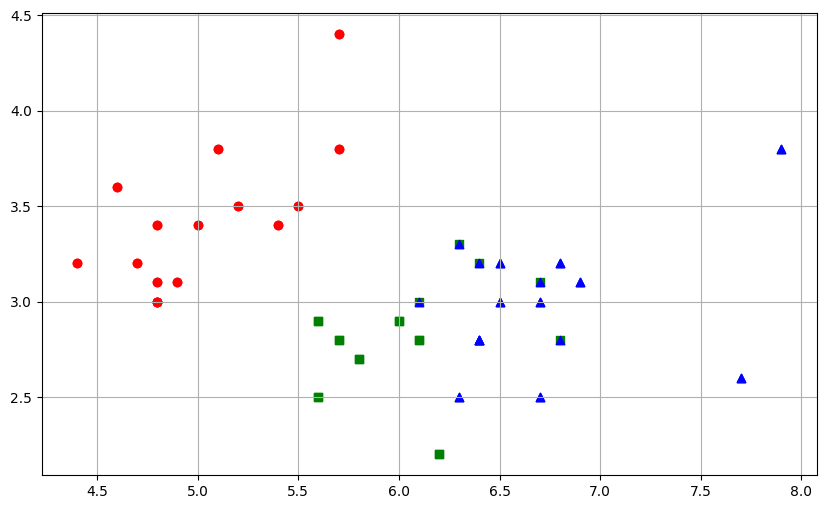

In [26]:
plt.figure(figsize=(10, 6))
plt.grid()
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for i in range(3):
    plt.scatter(X_test[y_test == i,0], 
                X_test[y_test == i,1], 
                color=colors[i], 
                marker=markers[i], 
                label=iris.target_names[i])
    plt.scatter(X_test[y_pred == i,0], 
                X_test[y_pred == i,1], 
                color=colors[i], 
                marker=markers[i], 
                label=iris.target_names[i])

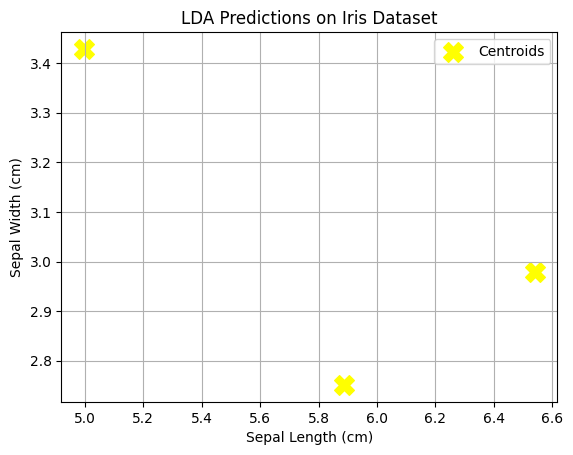

In [27]:
centers = lda.means_
plt.scatter(centers[:, 0], centers[:, 1], s=200, color='yellow', marker='X', label='Centroids')
plt.title('LDA Predictions on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()

In [28]:
#Отбрасываем целевую переменную и оставляем только два признака
X_reduced = iris.data[:, :2]  # sepal_length и sepal_width


In [29]:
#Подбираем оптимальное число кластеров для алгоритма KMeans
silhouette_scores = []
K_range = range(2, 11)  # Проверяем от 2 до 10 кластеров

In [30]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    score = silhouette_score(X_reduced, kmeans.labels_)
    silhouette_scores.append(score)

In [31]:
# оптимальное количество кластеров
optimal_k = K_range[np.argmax(silhouette_scores)]

In [32]:
optimal_k 

2

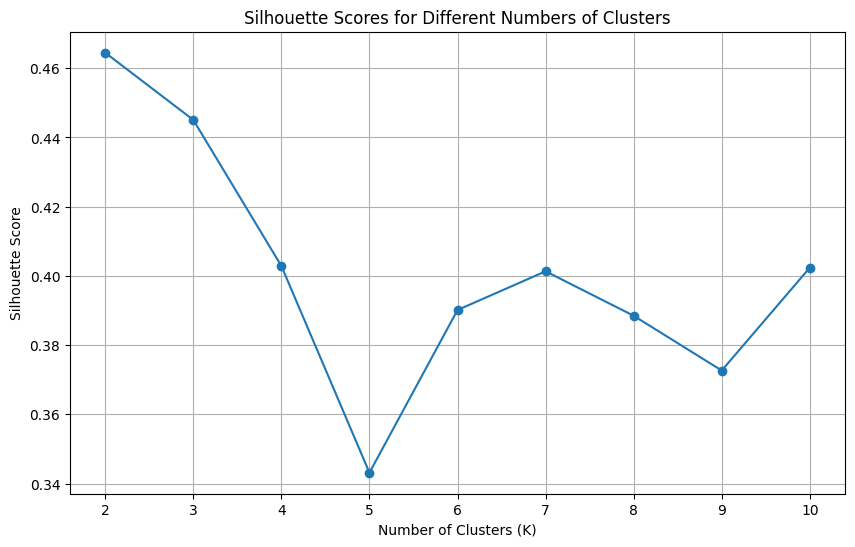

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid()
plt.show()

In [34]:
# Оптимально количество кластеров = 2. Применим его
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_reduced)

KMeans(n_clusters=2, random_state=42)

In [35]:
# Визуализируем полученную кластеризацию для количества классов 3 и кластеров 2

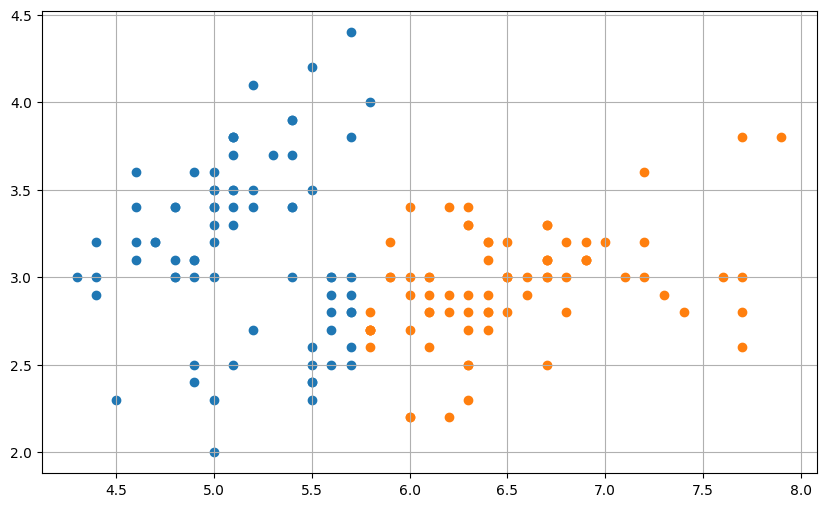

In [36]:
plt.figure(figsize=(10, 6))
plt.grid()
for i in range(3):
    plt.scatter(X_reduced[kmeans.labels_ == i, 0], X_reduced[kmeans.labels_ == i, 1], label=f'Cluster {i}')